# Курсовая работа ФКИИ
Грушецкий Геннадий М80-114СВ-24

##Загрузка Библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

# 1. Описание датасета

Используется для распознавания одежды по пикселям из датасета.

1. **Состав**:
   - Датасет включает в себя 70,000 изображений, из которых 60,000 используются для обучения и 10,000 — для тестирования.
   - Каждое изображение имеет размер 28x28 пикселей и представлено в градациях серого.

2. **Классы**:
   - Fashion содержит 10 различных классов одежды и аксессуаров:
     1. T-shirt/top (футболка/рубашка)
     2. Trouser (брюки)
     3. Pullover (свитер)
     4. Dress (платье)
     5. Coat (пальто)
     6. Sandal (сандалии)
     7. Shirt (рубашка)
     8. Sneaker (кроссовки)
     9. Bag (сумка)
     10. Ankle boot (ботинки)

3. **Формат**:
   - Изображения хранятся в массиве, где каждое изображение представлено одномерным вектором длины 784 (28x28), а классы представлены в виде меток.

## Загрузка датасета из библиотеки

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Создание списка видов одежды с распознавания

In [19]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

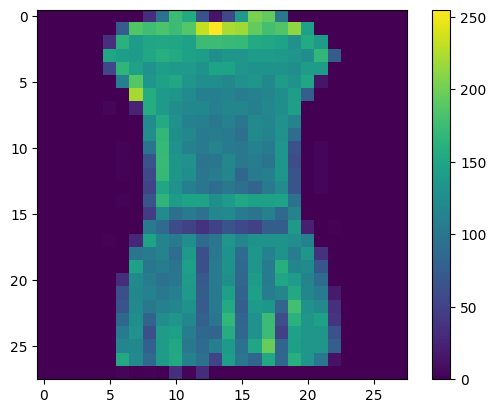

In [4]:
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()
plt.grid(False)

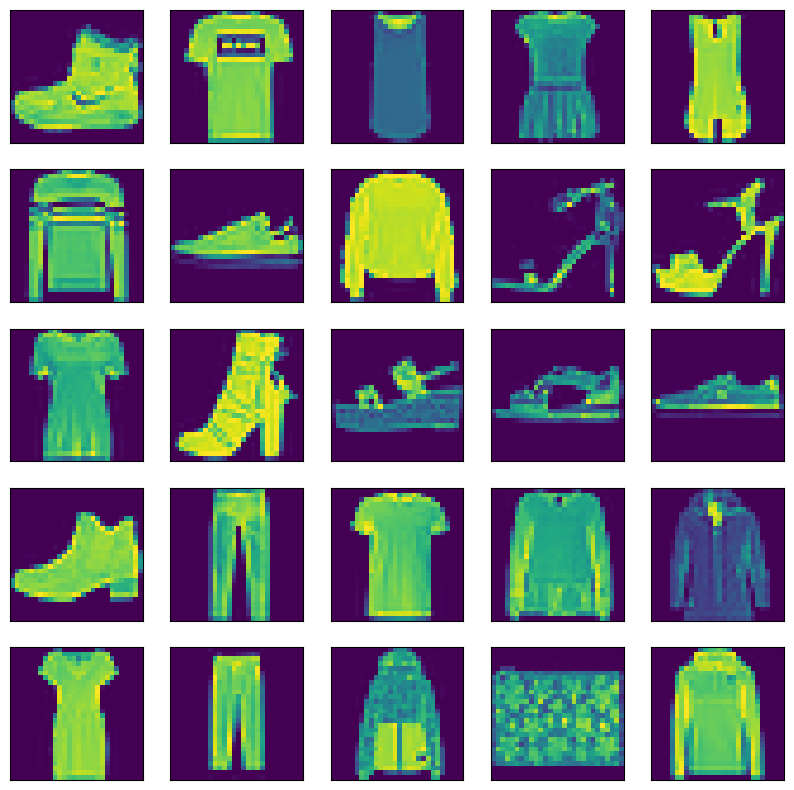

In [20]:
plt.figure(figsize=(10, 10))
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])

## Загрузка датасета из файла прямо в систему

In [17]:
data = pd.read_csv('fashion-mnist_train.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(11838, 785)
['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel9

In [18]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Статистика

 Распределение одежды на выборке

[1199, 1156, 1130, 1199, 1154, 1185, 1214, 1233, 1157, 1211]


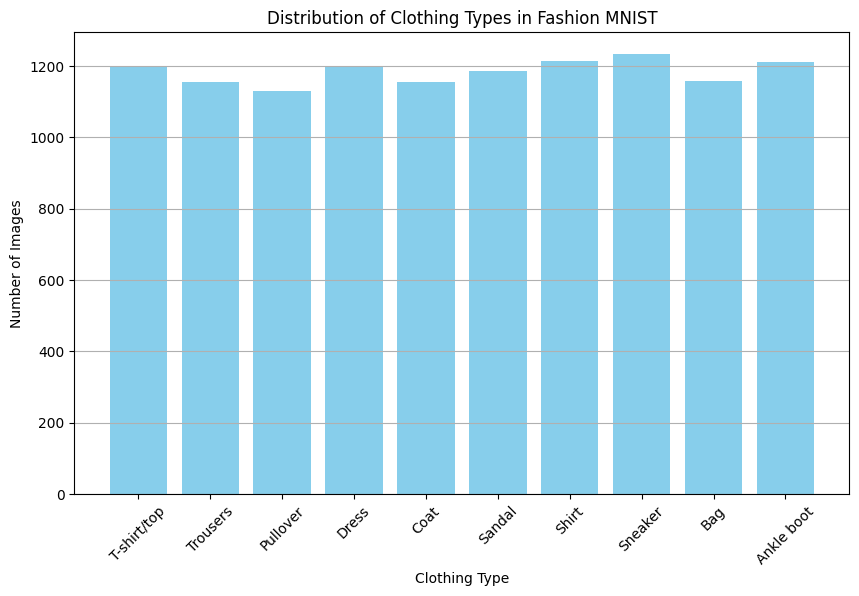

In [31]:
counter = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in data['label']:
  if i == 0:
    counter[0] += 1
  elif i == 1:
    counter[1] += 1
  elif i == 2:
    counter[2] += 1
  elif i == 3:
    counter[3] += 1
  elif i == 4:
    counter[4] += 1
  elif i == 4:
    counter[4] += 1
  elif i == 5:
    counter[5] += 1
  elif i == 6:
    counter[6] += 1
  elif i == 7:
    counter[7] += 1
  elif i == 8:
    counter[8] += 1
  elif i == 9:
    counter[9] += 1
print(counter)

plt.figure(figsize=(10, 6))
plt.bar(class_names, counter, color='skyblue')
plt.title('Distribution of Clothing Types in Fashion MNIST')
plt.xlabel('Clothing Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [6]:
#нормализация - все приводится к нормальному распределению со средним значением 0 и отклонением 1
#регуляризация - все к одному диапазону
x_train = x_train / 255
x_test = x_test / 255
#для работы с мнистом
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # Чтоб флаттен применять, надо картинки нормализовать
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = keras.utils.to_categorical(y_train, 10) # разбиение названий (вместо названий цифры)
y_test = keras.utils.to_categorical(y_test, 10) # чтоб модель работала
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Оба датасета идентины, несмотря на тот, что один хранится в библиотеке, а второй представлен в виде файла с Kaggle.

## 3. Алгоритм и обучение модели

In [8]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28, 1)), # 2д в 1д
                          keras.layers.Dense(128, activation="relu"), # можно еще сигмоиду в качестве функции активации
                          keras.layers.Dense(56, activation="relu"),
                          keras.layers.Dense(10, activation="softmax") # вывод в списке вероятностей
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# можно еще recall (полнота) и precision (точность)
# MSE (прогнозируемое - истинное в квадрате), MAE (тоже самое, но без квадрата, а в модуле)
# изменение скорости обучения и изменения градиента с помощью функции накопления импульса
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 56)                  │           7,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,274 (422.95 KB)

 Trainable params: 108,274 (422.95 KB)

 Non-trainable params: 0 (0.00 B)

Обучение

In [33]:
train = model.fit(x_train, y_train, epochs=3, batch_size = 2, verbose=1, validation_data=(x_test, y_test)) # Эпох мало ставлю из-за величины выборки - очень уж большая

Epoch 1/3
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.8545 - loss: 0.3940 - val_accuracy: 0.8557 - val_loss: 0.4029
Epoch 2/3
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.8676 - loss: 0.3566 - val_accuracy: 0.8630 - val_loss: 0.3805
Epoch 3/3
30000/30000 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.8775 - loss: 0.3283 - val_accuracy: 0.8685 - val_loss: 0.3602


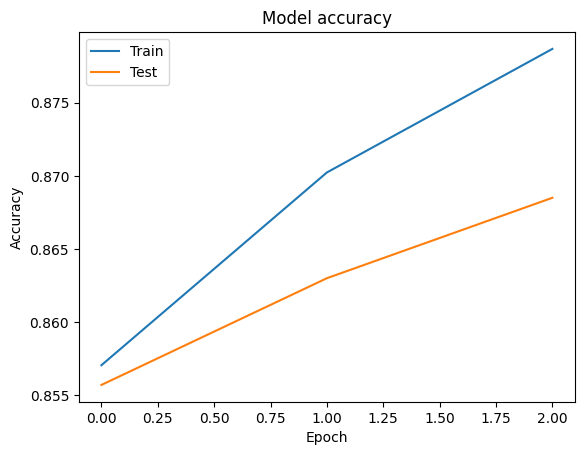

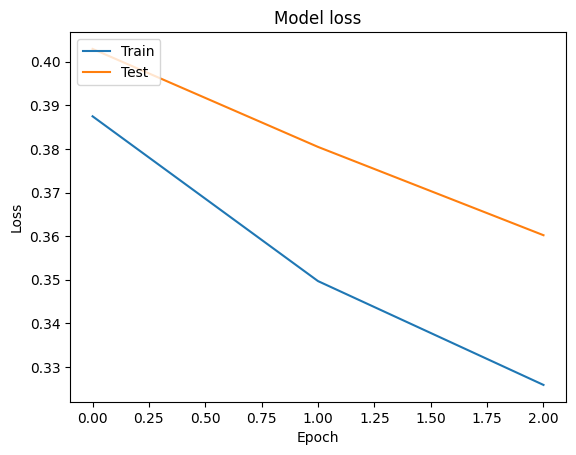

In [34]:
plt.plot(train.history["accuracy"])
plt.plot(train.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

plt.plot(train.history["loss"])
plt.plot(train.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Loss on test:', score[0])
print('Accuracy on test:', score[1])

Loss on test: 0.36021146178245544
Accuracy on test: 0.8684999942779541


In [36]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
predictions.shape

(10000, 10)

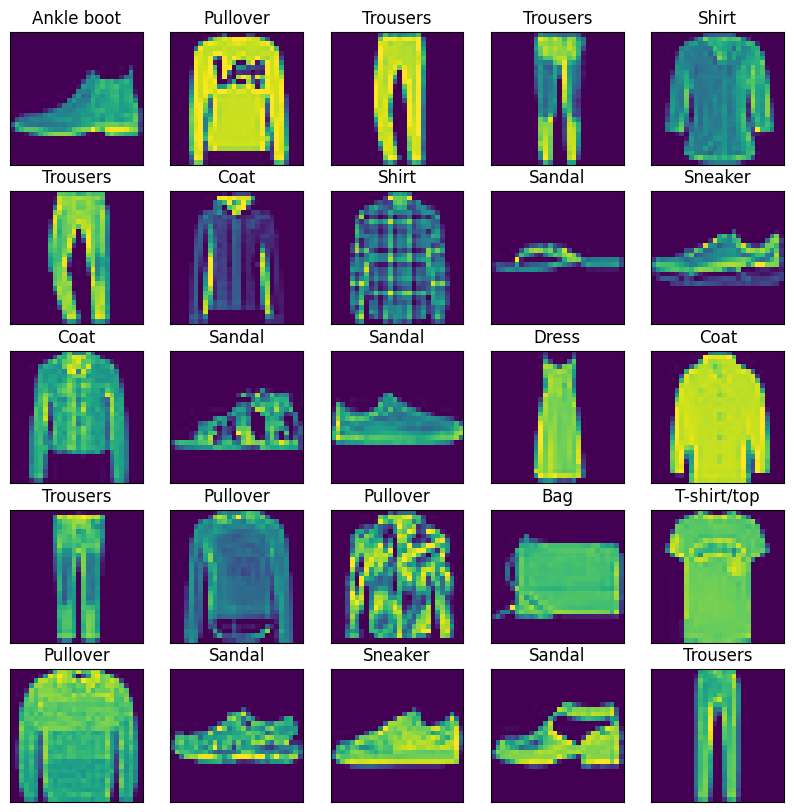

In [38]:
plt.figure(figsize=(10, 10))
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i])
  plt.title(class_names[np.argmax(predictions[i])])

К сожалению датасет MNIST обладает хорошей теоретической точностью, но фактической на изображениях будет низкой. Поэтому на тестовой выборке он угадал все, но в ручных тестах точность не превышает 15% при любых параметрах обучения.

## **Выбросы**

Выбросов как таковых выборка не имеет, ведь все цвета находятся в интервале 1-255, а классов всего 9, что также никогда не выбивается.

## **Кластеризация**

Здесь также сложно выполнить кластеризацию, разве что по пикселям, но остальное необходимо для обучения и теста выборки, а без части выборки обучение не получится, ведь кластеризация - это выделение взаимосвязей из датасета.